In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
import timeit

In [2]:
df=pd.read_csv(r"C:\Users\91700\OneDrive\Desktop\Invistico_Airline.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


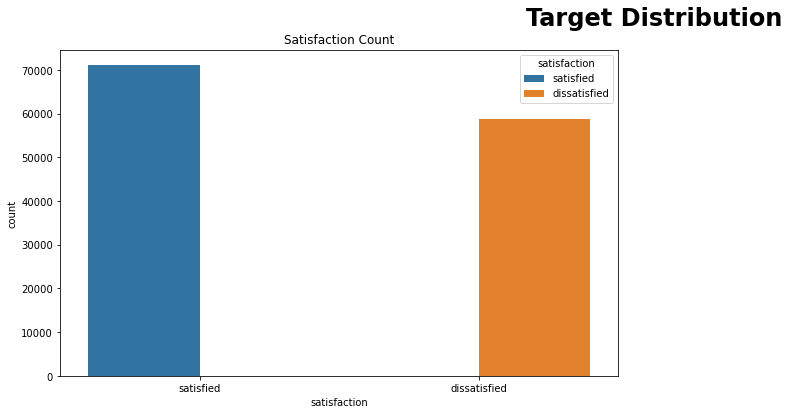

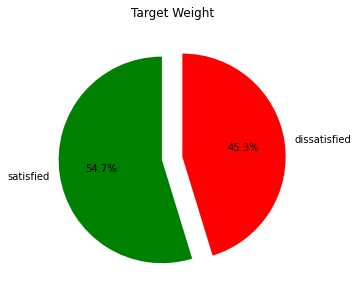

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(22,6))
plt.suptitle('Target Distribution',weight='bold',fontsize=24)
grid=gridspec.GridSpec(1,2,figure=fig)

ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')
sns.countplot(x='satisfaction',data=df,ax=ax1,hue='satisfaction')
plt.show()

fig = plt.figure(figsize=(10, 5))
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label=list(df['satisfaction'].value_counts().index)
value=list(df['satisfaction'].value_counts().values)
color = ['green', 'red']

ax2.pie(value,labels=label,autopct='%1.1f%%',explode=(0,0.2),startangle=90,colors=color)
ax2.axis('equal')
plt.show()


In [4]:
satisfaction_counts = df['satisfaction'].value_counts()
print(satisfaction_counts)


satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


<AxesSubplot:title={'center':'Age'}, xlabel='Age', ylabel='Density'>

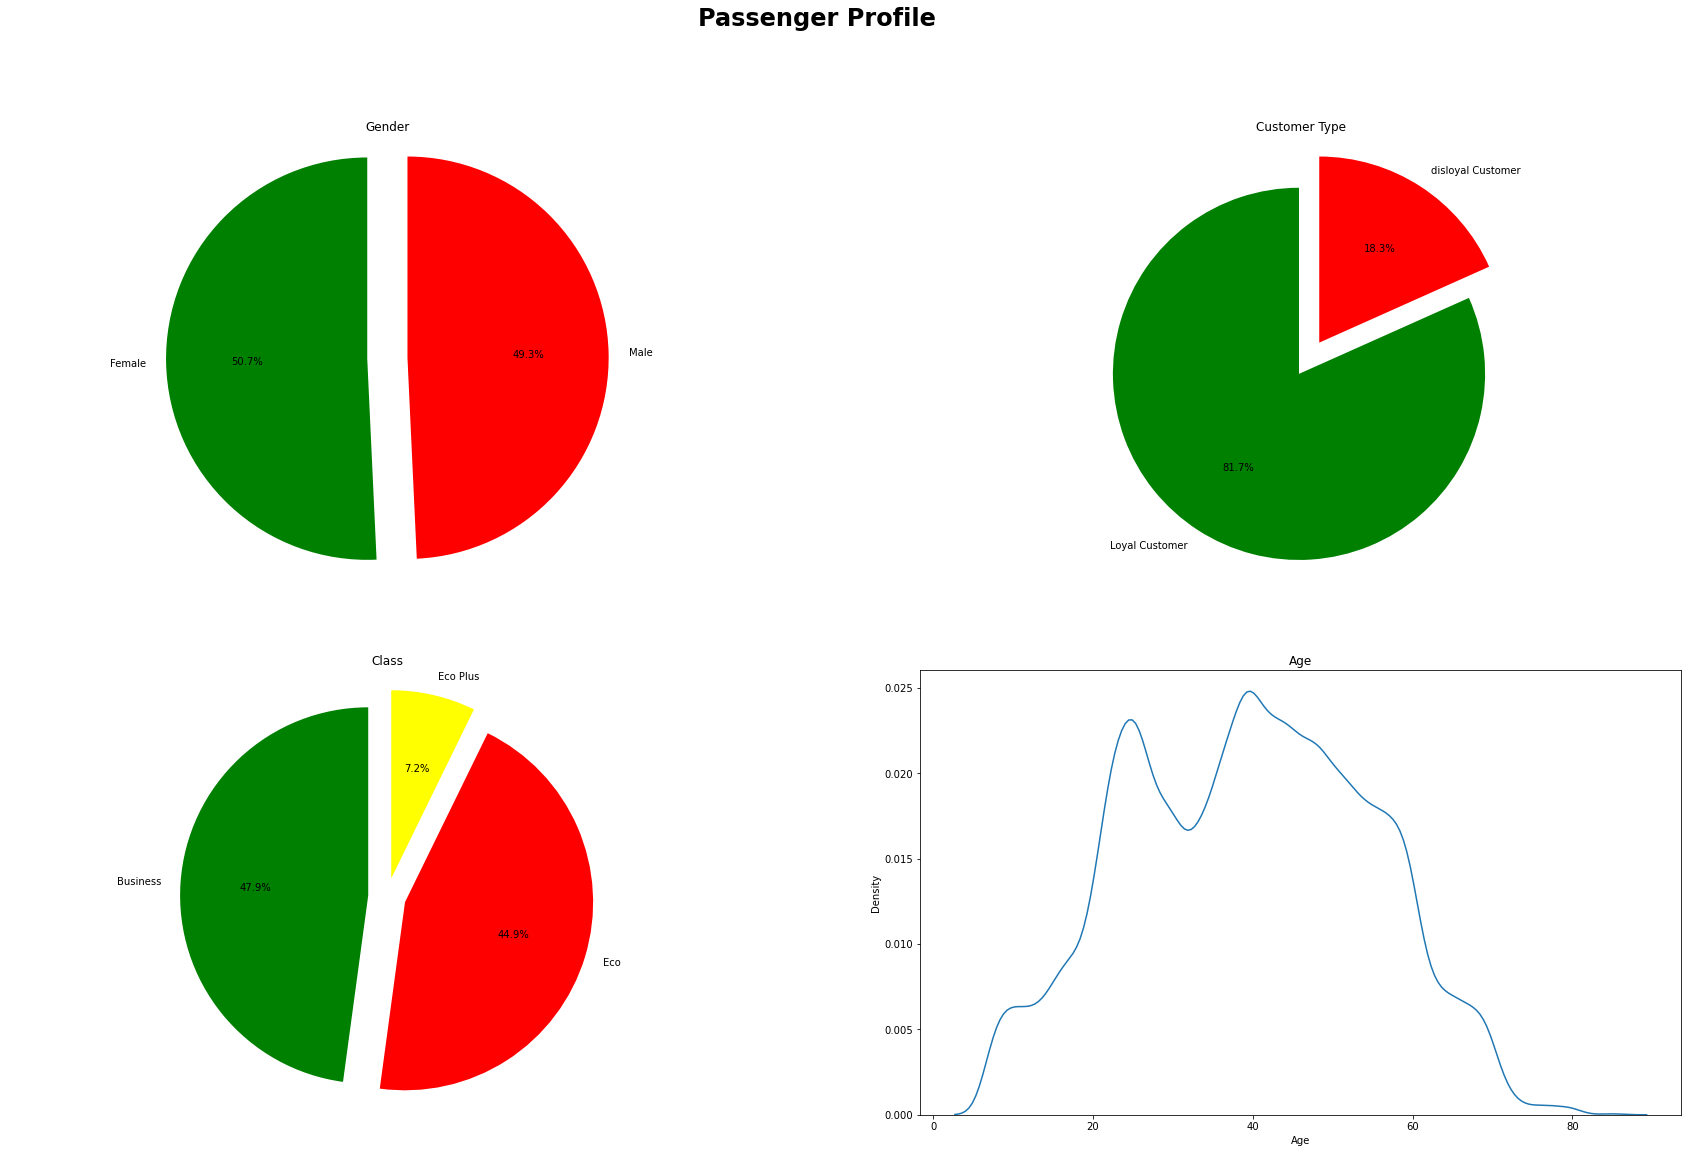

In [5]:
# gender,#type of travel , #class,#age of people
import seaborn as sns

fig=plt.figure(figsize=(30,18))
plt.suptitle('Passenger Profile',weight='bold',fontsize=24)
grid=gridspec.GridSpec(2,2,figure=fig)

ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Gender')
label=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)
color = ['green', 'red']
ax1.pie(value,labels=label,autopct='%1.1f%%',explode=(0,0.2),startangle=90,colors=color)
ax1.axis('equal')

ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type')
label=list(df['Customer Type'].value_counts().index)
value=list(df['Customer Type'].value_counts().values)
color = ['green', 'red']

ax2.pie(value,labels=label,autopct='%1.1f%%',explode=(0,0.2),startangle=90,colors=color)
ax2.axis('equal')

ax3=fig.add_subplot(grid[1,:1])
ax3.set_title('Class')
label=list(df['Class'].value_counts().index)
value=list(df['Class'].value_counts().values)
color = ['green', 'red','yellow']

ax3.pie(value,labels=label,autopct='%1.1f%%',explode=(0.1,0.1,0.1),startangle=90,colors=color)
ax3.axis('equal')

ax4=fig.add_subplot(grid[1,1:])
ax4.set_title('Age')

sns.kdeplot(df['Age'],ax=ax4)



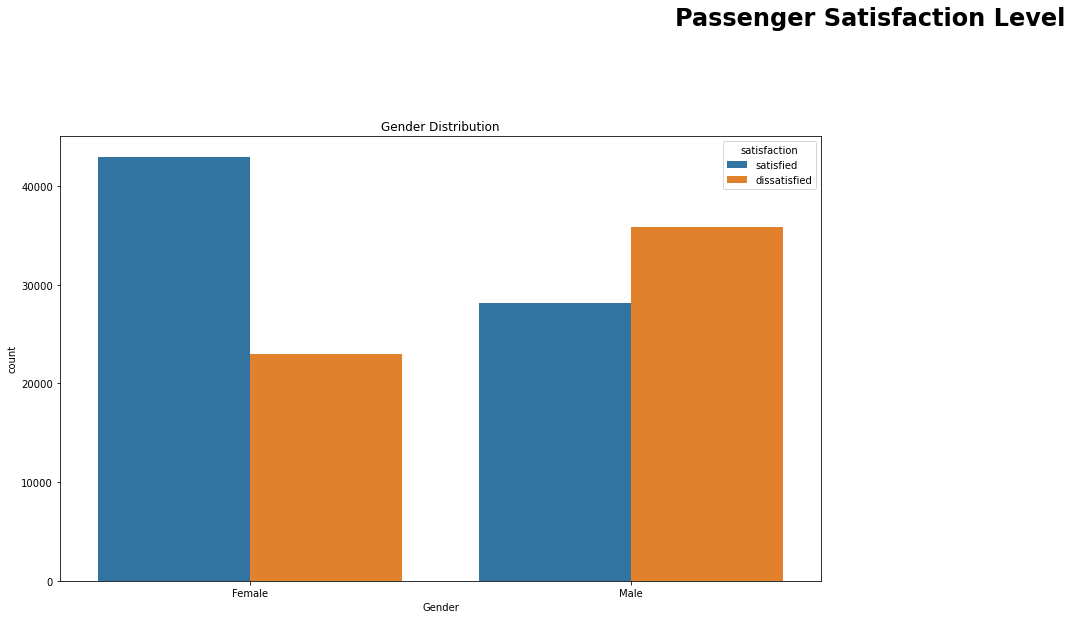

In [6]:
fig=plt.figure(figsize=(30,18))
plt.suptitle('Passenger Satisfaction Level',weight='bold',fontsize=24)
grid=gridspec.GridSpec(2,2,figure=fig)

ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Gender Distribution')
sns.countplot(x=df['Gender'],hue=df['satisfaction'],ax=ax1)
plt.show()

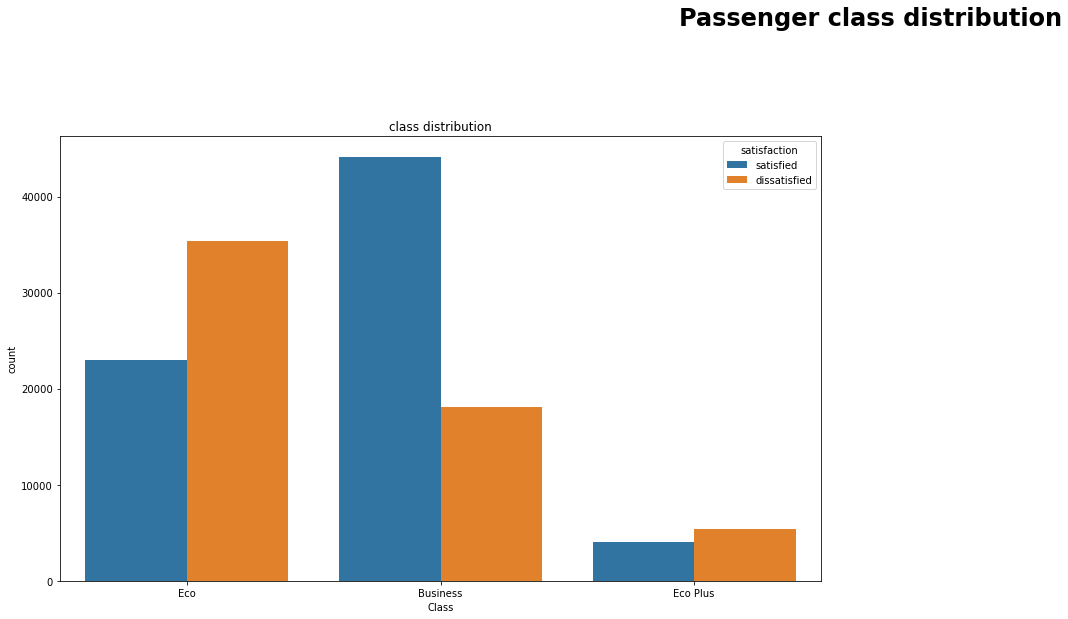

In [7]:
fig=plt.figure(figsize=(30,18))
plt.suptitle('Passenger class distribution',weight='bold',fontsize=24)
grid=gridspec.GridSpec(2,2,figure=fig)

ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('class distribution')
sns.countplot(x=df['Class'],hue=df['satisfaction'],ax=ax1)
plt.show()

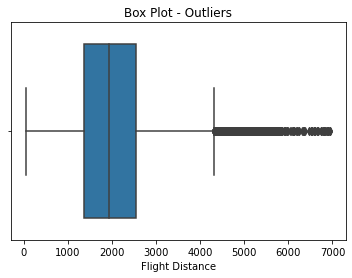

In [8]:
#outlier detection 
sns.boxplot(x=df['Flight Distance'])

# Set the plot title and labels
plt.title("Box Plot - Outliers")
plt.xlabel('Flight Distance')

# Show the plot
plt.show()

In [9]:
print(df.isnull().sum())

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [10]:
abs_corr_features = df.corr().abs()

rearrange = (abs_corr_features.where(np.triu(np.ones(abs_corr_features.shape), k=1)
                                     .astype(np.bool)).stack().sort_values(ascending=False))

print(rearrange)

Departure Delay in Minutes         Arrival Delay in Minutes    0.965291
Seat comfort                       Food and drink              0.715997
Ease of Online booking             Online boarding             0.684320
Online support                     Online boarding             0.669843
Baggage handling                   Cleanliness                 0.631803
                                                                 ...   
Age                                Gate location               0.000547
Departure/Arrival time convenient  Online support              0.000546
Leg room service                   Arrival Delay in Minutes    0.000472
Gate location                      Baggage handling            0.000401
                                   Inflight entertainment      0.000280
Length: 153, dtype: float64


C:\Users\91700\AppData\Local\Temp\ipykernel_24596\828456858.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.bool)).stack().sort_values(ascending=False))


In [11]:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Seat comfort                       129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Food and drink                     129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Inflight wifi service              129880 non-null  

In [13]:
print(df.isnull().sum())

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64


In [14]:
df_categorical = df.select_dtypes(exclude=['number', 'bool_', 'float_'])
df_categorical.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [15]:
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'Online support'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>],
       [<AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Cleanliness'}>,
        <AxesSubplot:title={'center':'Online boarding'}>],
       [<AxesSubplot:title={'center':'Departure De

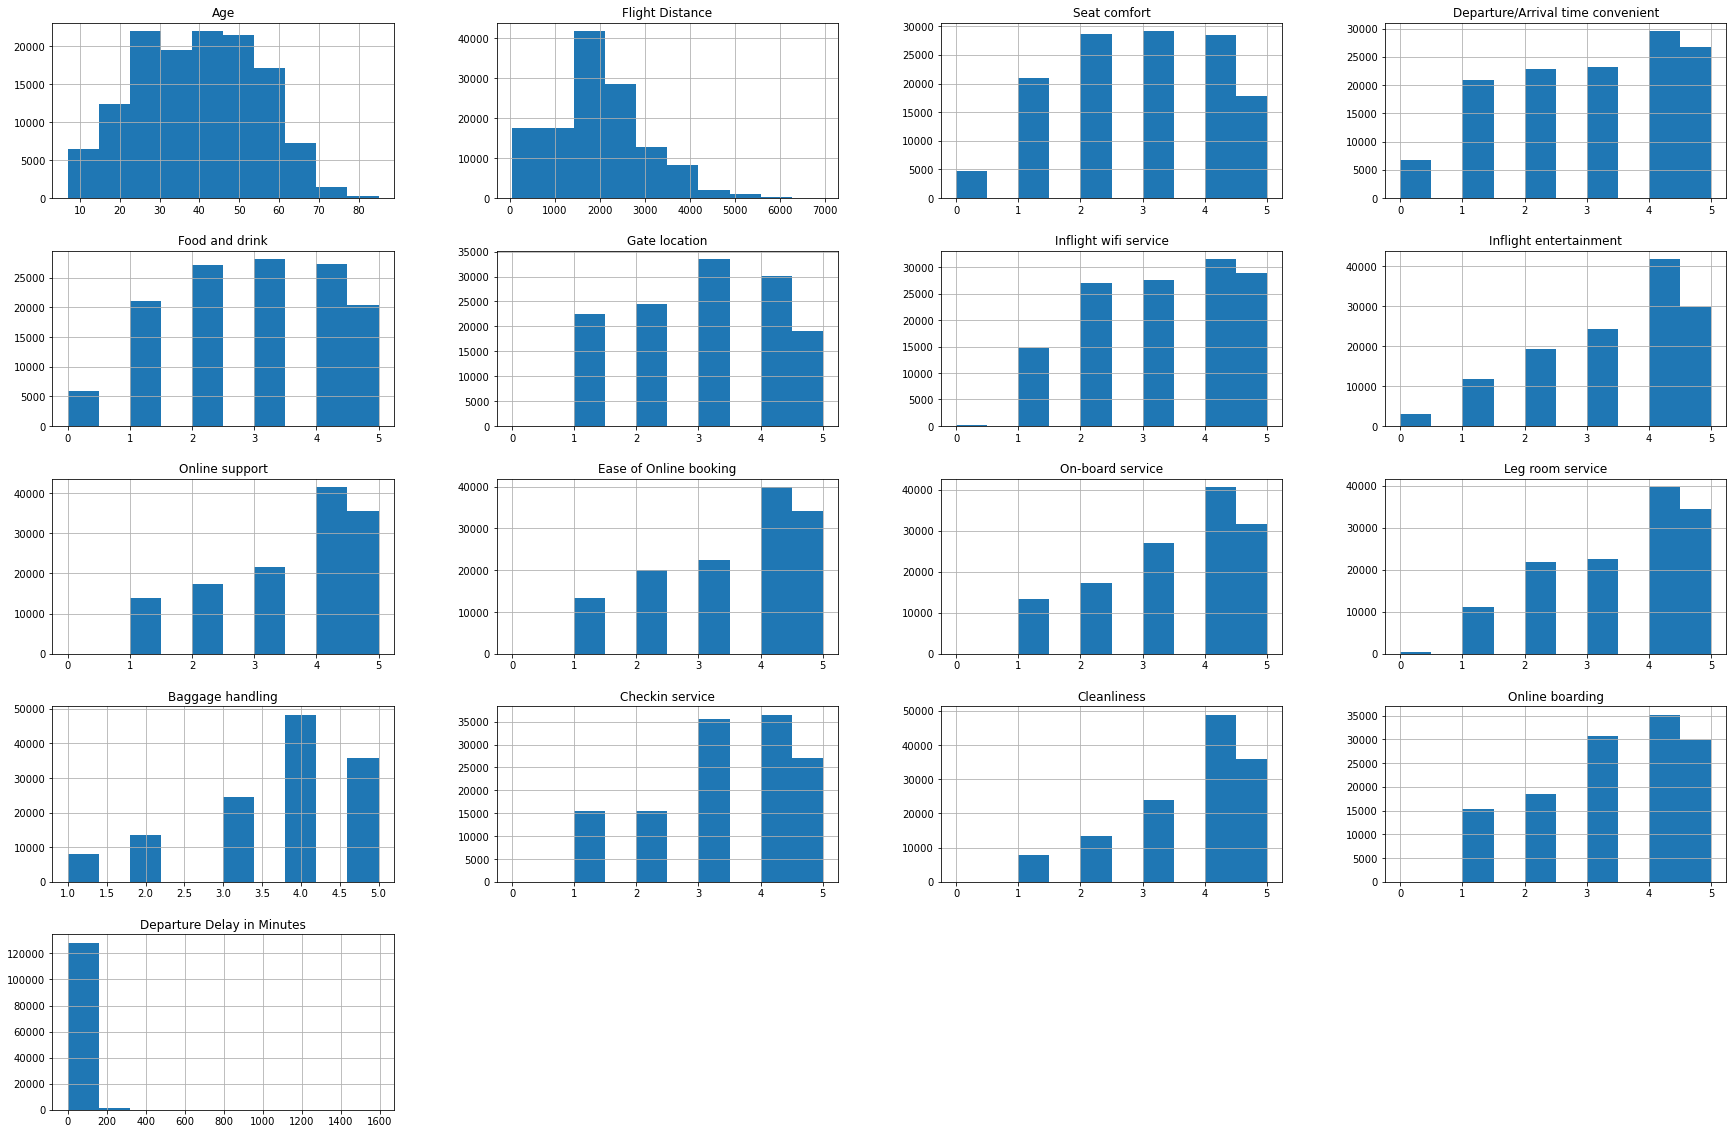

In [16]:
df.hist(figsize=(30, 20))


In [17]:
label_encoder = preprocessing.LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])


print(df.dtypes)

satisfaction                         object
Gender                                int32
Customer Type                         int32
Age                                   int64
Type of Travel                        int32
Class                                 int32
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
dtype: object


In [18]:
y = df['satisfaction']
print(y.size)

129880


In [19]:
y = y.replace({'satisfied': 1, 'dissatisfied': 0})

y = y.to_numpy()

In [20]:
X = df.loc[:, df.columns != 'satisfaction']
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0,0,65,1,1,265,0,0,0,2,...,4,2,3,3,0,3,5,3,2,0
1,1,0,47,1,0,2464,0,0,0,3,...,2,2,3,4,4,4,2,3,2,310
2,0,0,15,1,1,2138,0,0,0,3,...,0,2,2,3,3,4,4,4,2,0
3,0,0,60,1,1,623,0,0,0,3,...,4,3,1,1,0,1,4,1,3,0
4,0,0,70,1,1,354,0,0,0,3,...,3,4,2,2,0,2,4,2,5,0


In [21]:
print(X.shape)

(129880, 21)


In [22]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,0,0,65,1,1,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,1,0,47,1,0,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,0,0,15,1,1,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,0,0,60,1,1,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,0,0,70,1,1,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,0,1,29,1,1,1731,5,5,5,...,5,2,2,3,3,4,4,4,2,0
129876,dissatisfied,1,1,63,1,0,2087,2,3,2,...,1,1,3,2,3,3,1,2,1,174
129877,dissatisfied,1,1,69,1,1,2320,3,0,3,...,2,2,4,4,3,4,2,3,2,155
129878,dissatisfied,1,1,66,1,1,2450,3,2,3,...,2,2,3,3,2,3,2,1,2,193


In [23]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(df.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(129880, 22) (97410, 21) (32470, 21) (97410,) (32470,)


In [24]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.492616,0.183092,39.427957,0.309416,0.593864,1981.409055,2.838597,2.990645,2.851994,2.990422,...,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713
std,0.499947,0.386743,15.119360,0.462255,0.621378,1027.115606,1.392983,1.527224,1.443729,1.305970,...,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126
min,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [25]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test) #to normalize

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = classifier.predict(X_test)
print(y_pred,y_test)

[1 1 1 ... 1 0 0] [1 1 0 ... 1 0 1]


In [28]:
pred_comp_test=pd.DataFrame({'actual':y_test,'Pred':y_pred})
pred_comp_test

,actual,Pred
0,1,1
1,1,1
2,0,1
3,1,1
4,0,0
...,...,...
32465,1,1
32466,0,1
32467,1,1
32468,0,0


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[11936  2684]
 [ 2764 15086]]


In [30]:
(11936+2684)/(11936+2684+2764+15086)

0.450261780104712

In [31]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_test,y_pred))

accurace: 0.83221435170927


In [32]:
from sklearn.metrics import classification_report
cm_class_test=classification_report(y_test,y_pred)
print(cm_class_test)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     14620
           1       0.85      0.85      0.85     17850

    accuracy                           0.83     32470
   macro avg       0.83      0.83      0.83     32470
weighted avg       0.83      0.83      0.83     32470



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
classifier = DecisionTreeClassifier(random_state=0)

In [35]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
y_pred = classifier.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9392054203880505
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14620
           1       0.94      0.95      0.94     17850

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [41]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9582383738835848
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14620
           1       0.97      0.95      0.96     17850

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9218355404989221
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     14620
           1       0.95      0.91      0.93     17850

    accuracy                           0.92     32470
   macro avg       0.92      0.92      0.92     32470
weighted avg       0.92      0.92      0.92     32470



In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# svm = SVC()

# # Train the model
# svm.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8167539267015707
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     14620
           1       0.83      0.83      0.83     17850

    accuracy                           0.82     32470
   macro avg       0.81      0.82      0.82     32470
weighted avg       0.82      0.82      0.82     32470

